<a href="https://colab.research.google.com/github/M-luthra07/LSTM-/blob/main/Practical_16_LSTM_to_predict_the_future_weather_of_a_city_using_weather_data_from_several_other_cities_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [5]:
df = pd.read_csv('/content/Weather Data in India from 1901 to 2017.csv')
df['AVG_TEMP'] = df.loc[:, 'JAN':'DEC'].mean(axis=1)

In [6]:
def create_lstm_data(series, seq_len=10):
    X, y = [], []
    for i in range(len(series) - seq_len):
        X.append(series[i:i+seq_len])
        y.append(series[i+seq_len])
    return np.array(X), np.array(y)

temp_series = df['AVG_TEMP'].values
X, y = create_lstm_data(temp_series)

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [7]:
model = Sequential([
    LSTM(64, input_shape=(10, 1), return_sequences=False),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 605.7094 - mae: 24.6060 - val_loss: 591.8842 - val_mae: 24.3234
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 540.7073 - mae: 23.2456 - val_loss: 518.0145 - val_mae: 22.7542
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 460.2285 - mae: 21.4424 - val_loss: 437.9430 - val_mae: 20.9207
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 385.0119 - mae: 19.6033 - val_loss: 342.7727 - val_mae: 18.5070
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 298.2299 - mae: 17.2505 - val_loss: 287.7547 - val_mae: 16.9558
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 257.9209 - mae: 16.0407 - val_loss: 256.4967 - val_mae: 16.0076
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 229.5821 - mae: 15.1253 - val_loss: 230.4820 - val_mae: 15.1733
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 198.7603 - mae: 14.0786 - val_loss: 200.2817 - val_mae: 14.1431
Epoch 9/50
11/11

In [8]:

# Predict and evaluate
y_pred = model.predict(X_test).flatten()
threshold = np.mean(df['AVG_TEMP'])
y_test_bin = y_test > threshold
y_pred_bin = y_pred > threshold

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Import the necessary functions
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Regression Metrics ---")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)


--- Regression Metrics ---
Mean Squared Error (MSE): 1.1707199046431571
Mean Absolute Error (MAE): 0.9579950055209068
R² Score: -3.6245557533372113


In [10]:
print("Accuracy:", accuracy_score(y_test_bin, y_pred_bin))
print("Precision:", precision_score(y_test_bin, y_pred_bin))
print("Recall:", recall_score(y_test_bin, y_pred_bin))
print("F1 Score:", f1_score(y_test_bin, y_pred_bin))

Accuracy: 0.045454545454545456
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


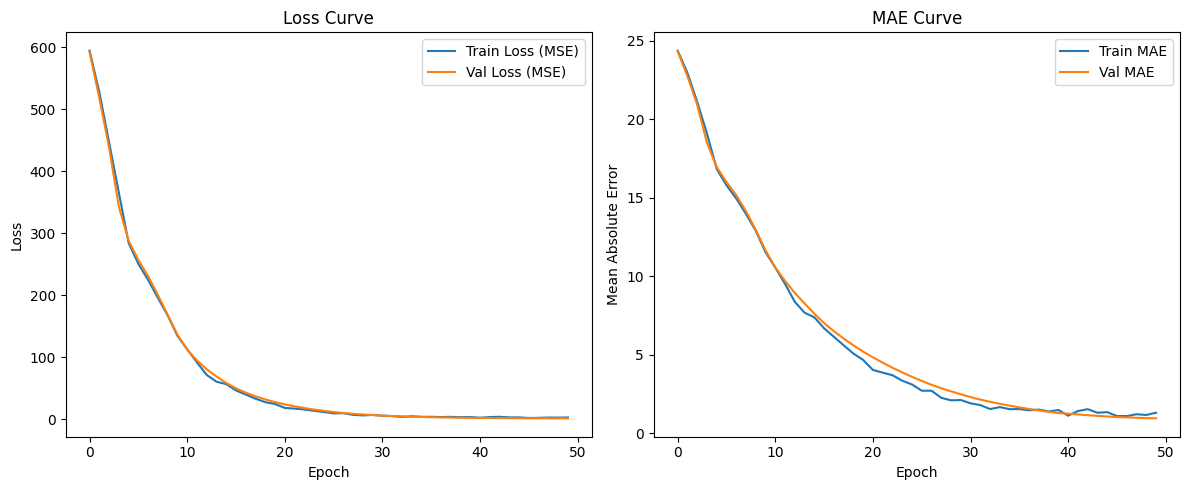

In [13]:
# Plot training curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Val Loss (MSE)')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('MAE Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()
